# Question 1
plotting out the data and determining scaling method

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace 'your_file.csv' with the path to your CSV file
file_path = 'data/Air_pollution.csv'

# Use pandas to read the CSV file into a DataFrame
df = pd.read_csv(file_path)


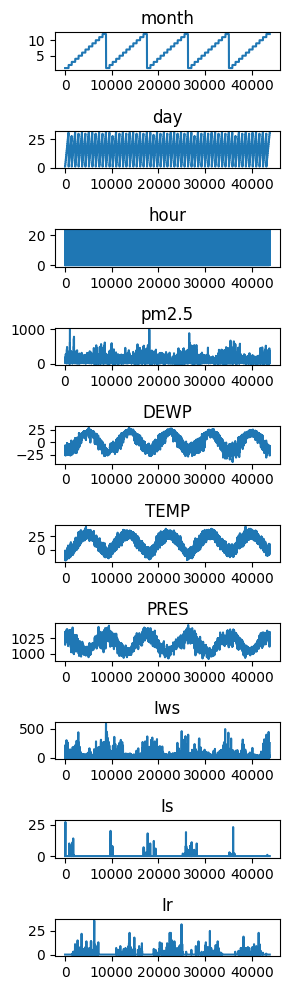

In [15]:
# taking out the nessesary data
new_df = df[['month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir']]

num_subplots = len(new_df.columns)

# Create subplots using plt.subplots, adjusting the size as needed
fig, axes = plt.subplots(nrows=num_subplots, ncols=1, figsize=(3, 1*num_subplots))

# Iterate through the rows and plot each row on a separate subplot
for i, row_name in enumerate(new_df):
    ax = axes[i]  # Get the current subplot
    new_df.loc[:, row_name].plot(ax=ax)  # Plot the row on the current subplot
    ax.set_title(row_name)  # Set the title of the subplot to the row name


# Adjust the layout to prevent overlapping titles and labels
plt.tight_layout()

# Show the plot
plt.show()

In [21]:
# conducting statistical analysis on the data we were given
from scipy.stats import shapiro

for i, row_name in enumerate(new_df):
    # check for the shapiro value or smt
    shapiro_stat, shapiro_p = shapiro(new_df.loc[:, row_name])
    print(f'shapiro wilk test p value for {row_name} is: {shapiro_p}, and {shapiro_stat}')

    # i should probably clean out the NaN values
    temp = new_df.loc[:, row_name]

# it seems like all the p values are of 0, which is weird. I wonder if it is caused by any issue in porgramming

shapiro wilk test p value for month is: 0.0, and 0.9414137601852417
shapiro wilk test p value for day is: 0.0, and 0.9542205333709717
shapiro wilk test p value for hour is: 0.0, and 0.9508436918258667
shapiro wilk test p value for pm2.5 is: 1.0, and nan
shapiro wilk test p value for DEWP is: 0.0, and 0.9515570998191833
shapiro wilk test p value for TEMP is: 0.0, and 0.9627156257629395
shapiro wilk test p value for PRES is: 0.0, and 0.9831407070159912
shapiro wilk test p value for Iws is: 0.0, and 0.4859059453010559
shapiro wilk test p value for Is is: 0.0, and 0.04295754432678223
shapiro wilk test p value for Ir is: 0.0, and 0.12150418758392334


d:\gitprojects\fasterrcnn\venv\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [26]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
import numpy as np

# sending them all into an array i guess
asset_input = pd.DataFrame(new_df, columns=['month', 'day', 'hour'])
x1 = asset_input.values

asset_input = pd.DataFrame(new_df, columns=['DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir'])
x2 = asset_input.values

asset_input = pd.DataFrame(new_df, columns=['pm2.5'])
y = asset_input.values

# Normalization for fixed ranged
scaler_x1 = MinMaxScaler()
scaler_x1.fit(x1)
x_scale1 = scaler_x1.transform(x1)

# robust for everything else
scaler_x2 = RobustScaler()
scaler_x2.fit(x2)
x_scale2 = scaler_x2.transform(x2)

x_scale = np.concatenate((x_scale1, x_scale2), axis=1)
del x_scale2, x_scale1

# robust scaling for the dependent variable
scaler_y = RobustScaler()
scaler_y.fit(y)
y_scale = scaler_y.transform(y)

# Question 2
This is gonna take a while

In [34]:
dic_keys = ['poly', 'knn', 'svm', 'ann']

# prepare dataset, where there is default, and then default + the rest
# this should be a list f arrays i guess, which makes my life easier
dataset_list = []
default_dataset = x_scale[:, 3:7]
dataset_list.append(default_dataset)

# concatenate the new datasets i guess
temp_slice = x_scale[:, 0]
temp_dataset = np.concatenate((default_dataset, temp_slice[:, np.newaxis]), axis=1)     # month
dataset_list.append(temp_dataset)
temp_slice = x_scale[:, 1]
temp_dataset = np.concatenate((default_dataset, temp_slice[:, np.newaxis]), axis=1)      # day
dataset_list.append(temp_dataset)
temp_slice = x_scale[:, 2]
temp_dataset = np.concatenate((default_dataset, temp_slice[:, np.newaxis]), axis=1)      # hour
dataset_list.append(temp_dataset)
temp_slice = x_scale[:, -1]
temp_dataset = np.concatenate((default_dataset, temp_slice[:, np.newaxis]), axis=1)      # ls
dataset_list.append(temp_dataset)
temp_slice = x_scale[:, -2]
temp_dataset = np.concatenate((default_dataset, temp_slice[:, np.newaxis]), axis=1)      # lr
dataset_list.append(temp_dataset)

# loop through each of the dataset
    # define nested dictionary for each of the different methods

    # goes through fitting every different type of neural network, and collect the best data into a array i guess
    # polynomial regression

    # k nearest neighbour

    # support machine vector

    # artificial neural network

In [33]:
# concatenate the new datasets i guess
temp_slice = x_scale[:, 0]
temp_dataset = np.concatenate((default_dataset, temp_slice[:, np.newaxis]), axis=1)     # month
dataset_list.append(temp_dataset)